# Uninformed Search

This notebook serves as supporting material for topics covered in **Lecture 3 - Uninformed Search** from the lecture *Grundlagen der Künstlichen Intelligenz (IN2062)* at the Technical University of Munich. This notebook uses implementations from [search.py](https://github.com/aimacode/aima-python/blob/master/search.py) module. Let's start by importing everything from the search module.

## How to use this notebook
Clone the aima-python repository to your local machine, and add this notebook as well as `search_helpers.py` **directly** to the root directory of aima-python in order to make the following imports work.

There is also a bigger notebook, *search.ipynb*, in the same root directory, which contains more examples from the book *Artificial Intelligence: A Modern Approach*. 

In [1]:
from search import *
from notebook import psource, heatmap, gaussian_kernel, show_map, final_path_colors, display_visual, plot_NQueens

# Needed to hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

## CONTENTS

* Visualization and Problem Setup
* Search algorithms
  1. Breadth-First Search
  2. Uniform-Cost Search
  3. Depth-First Search
  4. Depth-Limited Search
  5. Iterative Deepening Search
* What's next

# Visualization and Problem Setup
For visualisations, we use networkx and matplotlib to show the map in the notebook and we use ipywidgets to interact with the map to see how the searching algorithm works. These are imported as required in `notebook.py`.

In [2]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import lines

from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import time

Let's start by looking at a simple tree-search problem in **Lecture 3, Slides 32-43** and set up our tree structure.

In [3]:
simple_tree = UndirectedGraph(dict(
    A = dict(B=None, C=None),
    B = dict(D=None, E=None),
    C = dict(F=None, G=None)
))

simple_tree.locations = dict(
    A = (35, 40), 
    B = (15, 20), C = (55, 20),
    D = (0, 0), E = (30, 0), F = (40, 0), G = (70, 0)
)

`UndirectedGraph` is a `Graph` class in the `search.py` that allows you to construct a graph easily. Here we need a tree structure, which is just an undirected graph. If you are interested, see how the `Graph` class is constructed in `search.py`.

`locations` here gives the (x, y) coordinates in the canvas, and we will draw each node in our tree structure according to the `locations`.

In [4]:
simple_tree_locations = simple_tree.locations
print(simple_tree_locations)

{'A': (35, 40), 'B': (15, 20), 'C': (55, 20), 'D': (0, 0), 'E': (30, 0), 'F': (40, 0), 'G': (70, 0)}


To visualize the tree, we define a function `show_tree`. This function is originated from the `show_map` function in the `notebook` module, we made some modification to fit this notebook better. 

The `display_steps` funtion helps us to visualize the search algorithms step by step. 

In [5]:
from search_helpers import show_tree, display_steps

Now we feed in the necessary data and plot the tree structure. 

In [6]:
# node colors, node positions and node label positions
node_colors = {node: 'white' for node in simple_tree.locations.keys()}
node_positions = simple_tree.locations
node_label_pos = { k:[v[0]-3,v[1]]  for k,v in simple_tree.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in simple_tree.graph_dict.items() for k2, v2 in v.items()}

simple_tree_data = {  'graph_dict' : simple_tree.graph_dict,
                      'node_colors': node_colors,
                      'node_positions': node_positions,
                      'node_label_positions': node_label_pos,
                      'edge_weights': edge_weights
                     }

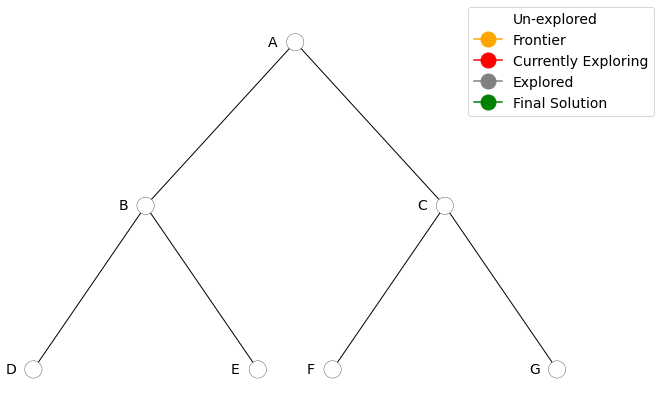

In [7]:
show_tree(simple_tree_data)

# 1. Breadth-First Search
The following code is a working implementation in search module with some minor modification. The pseudo code can also be found in **Lecture 3, Slide 30**.

This is the simple form of a BFS algorithm, the following code block just added some additional lines for visualization purpose based on this. 


```python
def breadth_first_graph_search(problem):
    """Search the shallowest nodes in the search tree first.
        Search through the successors of a problem to find a goal.
        The argument frontier should be an empty queue."""
    
    # Check if starting node == goal
    node = Node(problem.initial)
    if problem.goal_test(node.state):
        return node
    
    # Add children of initial node to frontier
    frontier = deque([Node(problem.initial)])  # FIFO queue
    
    # Explore frontier
    while frontier:
        node = frontier.popleft()
        explored.add(node.state)
        if problem.goal_test(node.state):
            return node
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                if problem.goal_test(child.state):
                    return child
                frontier.append(child)
    return None
```

In [17]:
def breadth_first_search_graph_vis(problem):
    """Search through the successors of a problem to find a goal.
    The argument frontier should be an empty queue."""
    
    # we use these two variables at the time of visualisation
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
      
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return(iterations, all_node_colors, node)
    
    frontier = deque([node])
    
    # modify the color of frontier nodes to blue
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
        
    explored = set()
    while frontier:
        node = frontier.popleft()
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        explored.add(node.state) 
        
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                if problem.goal_test(child.state):
                    node_colors[child.state] = "green"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))
                    return(iterations, all_node_colors, child)
                frontier.append(child)

                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
                
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None

def breadth_first_graph_search(problem):
    "Search the shallowest nodes in the search tree first."
    iterations, all_node_colors, node = breadth_first_search_graph_vis(problem)
    return(iterations, all_node_colors, node)

Now to run the algorithm: 

Execute the following code block, you will see a **"visualize" button** directly beneath the **"iteration" slider** if you are running this notebook for the first time. Otherwise you can always find the button on the bottom.

Click the **"visualize" button** and let the search algorithm run through, once it's completed, you can use the **slider** to see all the iterations step by step. 

In [18]:
all_node_colors = []
BFS_problem = GraphProblem('A', 'F', simple_tree)
a, b, c = breadth_first_graph_search(BFS_problem)
display_steps(simple_tree_data, user_input=False, 
              algorithm=breadth_first_graph_search, 
              problem=BFS_problem)


interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

# 2. Uniform-Cost Search (aka Dijkstra's algorithm)

When all step costs are equal, breadth-first is optimal because it always expands the shallowest nodes.

Uniform-cost search is optimal for any step costs, as it expands the node with the lowest path cost *g(n)*.

In the following code blocks, we will model a simple tree structure with edge weights this time, and apply the uniform-cost search. The corresponding example is in ***Lecture 3, Slide 55-72***

In [19]:
simple_tree1 = UndirectedGraph(dict(
    A = dict(B=2, C=3),
    B = dict(D=1, E=4),
    C = dict(F=5, G=2)
))

simple_tree1.locations = dict(
    A = (35, 40), 
    B = (15, 20), C = (55, 20),
    D = (0, 0), E = (30, 0), F = (40, 0), G = (70, 0)
)

In [20]:
# node colors, node positions and node label positions
node_colors = {node: 'white' for node in simple_tree1.locations.keys()}
node_positions = simple_tree1.locations
node_label_pos = { k:[v[0]-3,v[1]]  for k,v in simple_tree1.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in simple_tree1.graph_dict.items() for k2, v2 in v.items()}

simple_tree1_data = {  'graph_dict' : simple_tree1.graph_dict,
                       'node_colors': node_colors,
                       'node_positions': node_positions,
                       'node_label_positions': node_label_pos,
                       'edge_weights': edge_weights
                     }

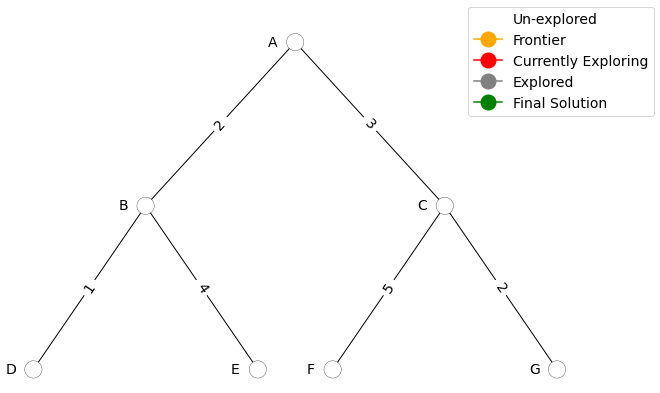

In [21]:
show_tree(simple_tree1_data)

Now we give the uniform-cost search algorithm with some additional lines for visualization. You can also find the pseudo code in ***Lecture 3, Slide 55***. 

<div class="alert alert-info">
    <h3>Note</h3>
    <p>Here we use the concept from <a href="https://github.com/aimacode/aima-python">aima-python</a>.</p> 
    <p>The uniform-cost search is based on the so-called <b>best-first graph search</b>. </p>
    <p>In the next notebook <i>InformedSearch.ipynb</i>, you will see that the <i>greedy best-first search</i> and <i>A-star search</i> can also use this as a foundation. The only change that needs to be made is the cost evaluation function. </p>
</div>

In [22]:
def best_first_graph_search_for_vis(problem, f):
    """Search the nodes with the lowest f scores first.
    You specify the function f(node) that you want to minimize; for example,
    if f is a heuristic estimate to the goal, then we have greedy best
    first search; if f is node.depth then we have breadth-first search.
    There is a subtlety: the line "f = memoize(f, 'f')" means that the f
    values will be cached on the nodes as they are computed. So after doing
    a best first search you can examine the f values of the path returned."""
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    f = memoize(f, 'f')
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return(iterations, all_node_colors, node)
    
    frontier = PriorityQueue('min', f)
    frontier.append(node)
    
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    explored = set()
    while frontier:
        node = frontier.pop()
        
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        explored.add(node.state)
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                frontier.append(child)
                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
            elif child in frontier:
                incumbent = frontier[child]
                if f(child) < f(incumbent):
                    del frontier[incumbent]
                    frontier.append(child)
                    node_colors[child.state] = "orange"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))

        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None

# Give the cost evaluation method as parameter, then we get UCS
def uniform_cost_search(problem):
    return best_first_graph_search_for_vis(problem, lambda node: node.path_cost)

In [23]:
all_node_colors = []
UCS_problem = GraphProblem('A', 'G', simple_tree1)
display_steps(simple_tree1_data, user_input=False, 
               algorithm=uniform_cost_search, 
               problem=UCS_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

# 3. Depth-First Search

Now let's make a tree with more depth and see how depth-first search works. (Also see **Lecture 3, Slide 75-82**)

In [13]:
simple_tree2 = Graph(dict(
    A = dict(B=None, C=None), B = dict(D=None, E=None),
    C = dict(F=None, G=None), D = dict(H=None, I=None),
    E = dict(J=None, K=None), F = dict(L=None, M=None),
    G = dict(N=None, O=None)
))

simple_tree2.locations = dict(
    A = (45, 55), 
    B = (25, 35), C = (65, 35),
    D = (15, 15), E = (35, 15), F = (55, 15), G = (75, 15),
    H = (10, 0), I = (20, 0), J = (30, 0), K = (40, 0),
    L = (50, 0), M = (60, 0), N = (70, 0), O = (80, 0)
)

In [14]:
# node colors, node positions and node label positions
node_colors = {node: 'white' for node in simple_tree2.locations.keys()}
node_positions = simple_tree2.locations
node_label_pos = { k:[v[0]-3,v[1]]  for k,v in simple_tree2.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in simple_tree2.graph_dict.items() for k2, v2 in v.items()}

simple_tree2_data = {  'graph_dict' : simple_tree2.graph_dict,
                      'node_colors': node_colors,
                      'node_positions': node_positions,
                      'node_label_positions': node_label_pos,
                      'edge_weights': edge_weights
                     }

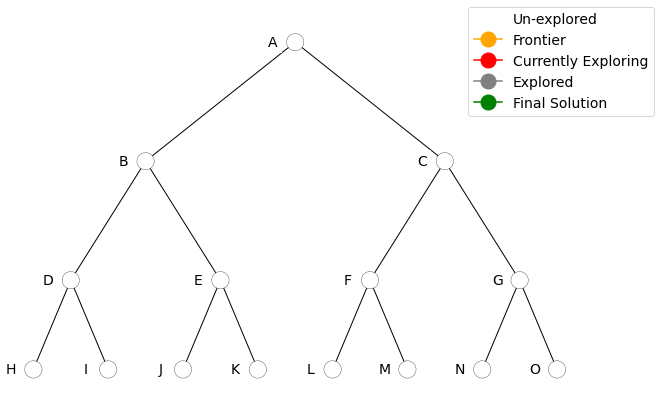

In [15]:
show_tree(simple_tree2_data)

Again, this is the simple form of a DFS algorithm, the following code block just added some additional lines for visualization purpose based on this. 

```python
def depth_first_graph_search(problem):
    """Search the deepest nodes in the search tree first.
        Search through the successors of a problem to find a goal.
        The argument frontier should be an empty queue."""
    
    # Check if starting node == goal
    node = Node(problem.initial)
    if problem.goal_test(node.state):
        return node
    
    # Add children of initial node to frontier
    frontier = deque([Node(problem.initial)])  # LIFO queue

    while frontier:
        node = frontier.pop()
        explored.add(node.state)

        if problem.goal_test(node.state):
            return node
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                if problem.goal_test(child.state):
                    return child
                frontier.append(child)
    return None
```

In [27]:
def depth_first_search_graph_vis(problem):
    """Search through the successors of a problem to find a goal.
    The argument frontier should be an empty queue.
    If two paths reach a state, only use the first one. [Figure 3.7]"""
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    frontier = [(Node(problem.initial))]
    explored = set()
    
    # modify the color of frontier nodes to orange
    node_colors[Node(problem.initial).state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
      
    while frontier:
        # Popping first node of stack
        node = frontier.pop()
        
        # modify the currently searching node to red
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            # modify goal node to green after reaching the goal
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        explored.add(node.state)
        frontier.extend(child for child in node.expand(problem)
                        if child.state not in explored and
                        child not in frontier)
        
        for n in frontier:
            # modify the color of new frontier nodes to orange
            if not(node_colors[n.state] == "orange"):
                node_colors[n.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))

        # modify the color of explored nodes to gray
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
    return None


def depth_first_graph_search(problem):
    """Search the deepest nodes in the search tree first."""
    iterations, all_node_colors, node = depth_first_search_graph_vis(problem)
    return(iterations, all_node_colors, node)

In [28]:
all_node_colors = []
DFS_problem = GraphProblem('A', 'K', simple_tree2)
display_steps(simple_tree2_data, user_input=False, 
               algorithm=depth_first_graph_search, 
               problem=DFS_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

<Figure size 576x360 with 0 Axes>

***Note***: Don't be confused if the DFS algorithm here explores node C first after node A (while in the example of the lecture we explore B first). 

Because we are using a stack here (Last In First Out - LIFO), and the node C is last in the frontier after we have explored A, so the algorithm explores node C after node A. 

# 4. Depth-Limited Search

What if depth-first search does not terminate in infinite state spaces? We can solve this issue by introducing a depth limit. Here we also illustrate how depth-limited search works with the example in ***Lecture 3, Slide 86-101***.

In [21]:
simple_tree3 = Graph(dict(
    A = dict(B=None, C=None), 
    B = dict(D=None, E=None), C = dict(F=None),
    E = dict(G=None, H=None)
))

simple_tree3.locations = dict(
    A = (25, 55), 
    B = (10, 35), C = (40, 35),
    D = (0, 15), E = (20, 15), F = (40, 15),
    G = (15, 0), H = (25, 0),
)

In [22]:
# node colors, node positions and node label positions
node_colors = {node: 'white' for node in simple_tree3.locations.keys()}
node_positions = simple_tree3.locations
node_label_pos = { k:[v[0]+1.4,v[1]]  for k,v in simple_tree3.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in simple_tree3.graph_dict.items() for k2, v2 in v.items()}

simple_tree3_data = {  'graph_dict' : simple_tree3.graph_dict,
                       'node_colors': node_colors,
                       'node_positions': node_positions,
                       'node_label_positions': node_label_pos,
                       'edge_weights': edge_weights
                     }

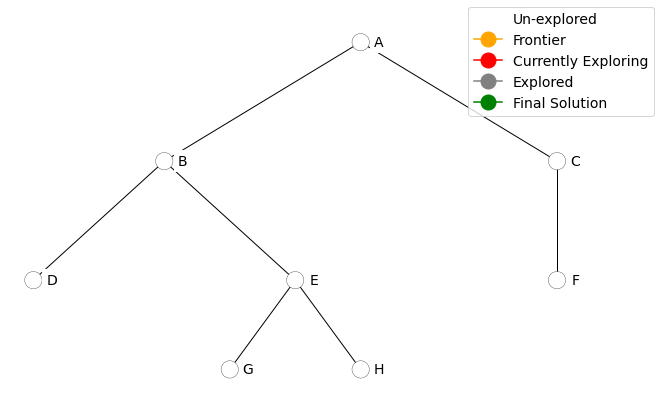

In [23]:
show_tree(simple_tree3_data)

This is how we construct the depth-limited search in python, for your reference, please also see the pseudo code in ***Lecture 3, Slide 87***
```python
def depth_limited_search(problem, limit=50):

    def recursive_dls(node, problem, limit):
        if problem.goal_test(node.state):
            return node
        elif limit == 0:
            return 'cutoff'
        else:
            cutoff_occurred = False
            for child in node.expand(problem):
                result = recursive_dls(child, problem, limit - 1)
                if result == 'cutoff':
                    cutoff_occurred = True
                elif result is not None:
                    return result
            return 'cutoff' if cutoff_occurred else None

    # Body of depth_limited_search:
    return recursive_dls(Node(problem.initial), problem, limit)
```

In [24]:
def depth_limited_search_for_vis(problem, limit=-1):
    '''
    Perform depth first search of graph g.
    if limit >= 0, that is the maximum depth of the search.
    '''
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    frontier = [Node(problem.initial)]
    explored = set()
    
    cutoff_occurred = False
    node_colors[Node(problem.initial).state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
        
    
    def recursive_dls(node, problem, limit, iterations, all_node_colors, node_colors):
        
        # modify the currently searching node to red
        node_colors[node.state] = "red"
        all_node_colors.append(dict(node_colors))
        
        iterations += 1
        

        if problem.goal_test(node.state):
            # modify goal node to green after reaching the goal
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return (iterations, all_node_colors, node)
        
        elif limit == 0:
            node_colors[node.state] = "gray"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return (iterations, all_node_colors, 'cutoff')
            
        else:
            cutoff_occurred = False
            
            # paint all the child (namely frontier) to organge.
            # this is redundent, but must be done for the visualization purpose
            """for child in node.expand(problem):
                node_colors[child.state] = "orange"
            all_node_colors.append(dict(node_colors))"""
            
            for child in node.expand(problem):
                node_colors[child.state] = "orange"
                all_node_colors.append(dict(node_colors))
                result = recursive_dls(child, problem, limit - 1, iterations, all_node_colors, node_colors)
                if result[2] == 'cutoff':
                    cutoff_occurred = True
                elif result[2] is not None:
                    return result
            if cutoff_occurred:
                node_colors[node.state] = "gray"
                iterations += 1
                all_node_colors.append(dict(node_colors))
                
            return (iterations, all_node_colors, 'cutoff') if cutoff_occurred else (iterations, all_node_colors, None)
        

    # Body of depth_limited_search:
    return recursive_dls(frontier.pop(), problem, limit, iterations, all_node_colors, node_colors)

In [25]:
# we set limit=2 just like the example in the lecture
limit = 2

def depth_limited_search(problem, limit = limit):
    """Search the deepest nodes in the search tree first."""

    result = depth_limited_search_for_vis(problem, limit=limit)
    if result[2] == 'cutoff':
        print("Due to the limit=%d, the goal state cannot be reached" % limit)
        all_node_colors = []
        node_colors = {k : 'white' for k in problem.graph.nodes()}
        all_node_colors.append(dict(node_colors))
        return(0, all_node_colors, Node(problem.initial))
    else:
        iterations, all_node_colors, node = depth_limited_search_for_vis(problem, limit=limit)
        return(iterations, all_node_colors, node)    

In [26]:
all_node_colors = []
DLS_problem = GraphProblem('A', 'F', simple_tree3)
display_steps(simple_tree3_data, user_input=False, 
               algorithm=depth_limited_search, 
               problem=DLS_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

# 5. Iterative Deepening Search

As you've seen in the previous section, the problem with depth-limited search is that, we typically don't know the depth of the goal state.

The solution for that is to iteratively increase the depth limit when using depth-limited search. We now see an example in ***Lecture 3, Slide 105-106***.

In [27]:
def iterative_deepening_search_for_vis(problem):
    all_node_colors = []
    for depth in range(sys.maxsize):
        iterations, new_all_node_colors, res = depth_limited_search_for_vis(problem, limit=depth)
        all_node_colors += new_all_node_colors;
        
        if res == 'cutoff':
            print("Due to limit=%d, the goal state cannot be reached" % depth)
            continue
        else:
            return(iterations, all_node_colors, res)
    return(iterations, all_node_colors, res)

In [28]:
all_node_colors = []
IDS_problem = GraphProblem('A', 'M', simple_tree2)
display_steps(simple_tree2_data, user_input=False, 
               algorithm=iterative_deepening_search_for_vis, 
               problem=IDS_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

<Figure size 576x360 with 0 Axes>

# What's next

Congratulation on completing this notebook! Now you have a better understanding of different search algorithms. 

The next notebook is about ***Lecture 4: Informed Search***
